In [40]:
import os
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")
%matplotlib inline


In [41]:
feature_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
                'Overall Height', 'Orientation', 'Glazing area', 'Glazing area distribution']
target_cols = ['Heating Load', 'Cooling Load']

In [42]:
notebook_path = os.path.abspath('visualizations.ipynb')
csv_path = os.path.join(os.path.dirname(notebook_path), '../data/ENB2012_data.csv')

In [57]:
ss = StandardScaler()

df = pd.read_csv(csv_path)
columns={
    'X1': 'Relative Compactness',
    'X2': 'Surface Area',
    'X3': 'Wall Area',
    'X4': 'Roof Area',
    'X5': 'Overall Height',
    'X6': 'Orientation',
    'X7': 'Glazing area',
    'X8': 'Glazing area distribution',
    'Y1': 'Heating Load',
    'Y2': 'Cooling Load',
}


df.rename(index=str, columns=columns , inplace=True)
df = shuffle(df)

df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing area,Glazing area distribution,Heating Load,Cooling Load
356,0.76,661.5,416.5,122.50,7.0,2,0.25,2,36.95,36.87
401,0.79,637.0,343.0,147.00,7.0,3,0.25,3,38.35,43.66
301,0.82,612.5,318.5,147.00,7.0,3,0.25,1,27.27,27.84
195,0.98,514.5,294.0,110.25,7.0,5,0.10,4,24.32,25.87
332,0.62,808.5,367.5,220.50,3.5,2,0.25,1,15.09,15.77


In [44]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing area,Glazing area distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [45]:
df_counts = pd.DataFrame(pd.Series([len(np.unique(df[col].values)) for col in df]))
df_counts.columns = ['Number of possible values']
df_counts.rename(dict(zip([x for x in range(len(df.columns.values))], df.columns.values)), axis='index', inplace=True)
df_counts

,Number of possible values
Relative Compactness,12
Surface Area,12
Wall Area,7
Roof Area,4
Overall Height,2
Orientation,4
Glazing area,4
Glazing area distribution,6
Heating Load,586
Cooling Load,636


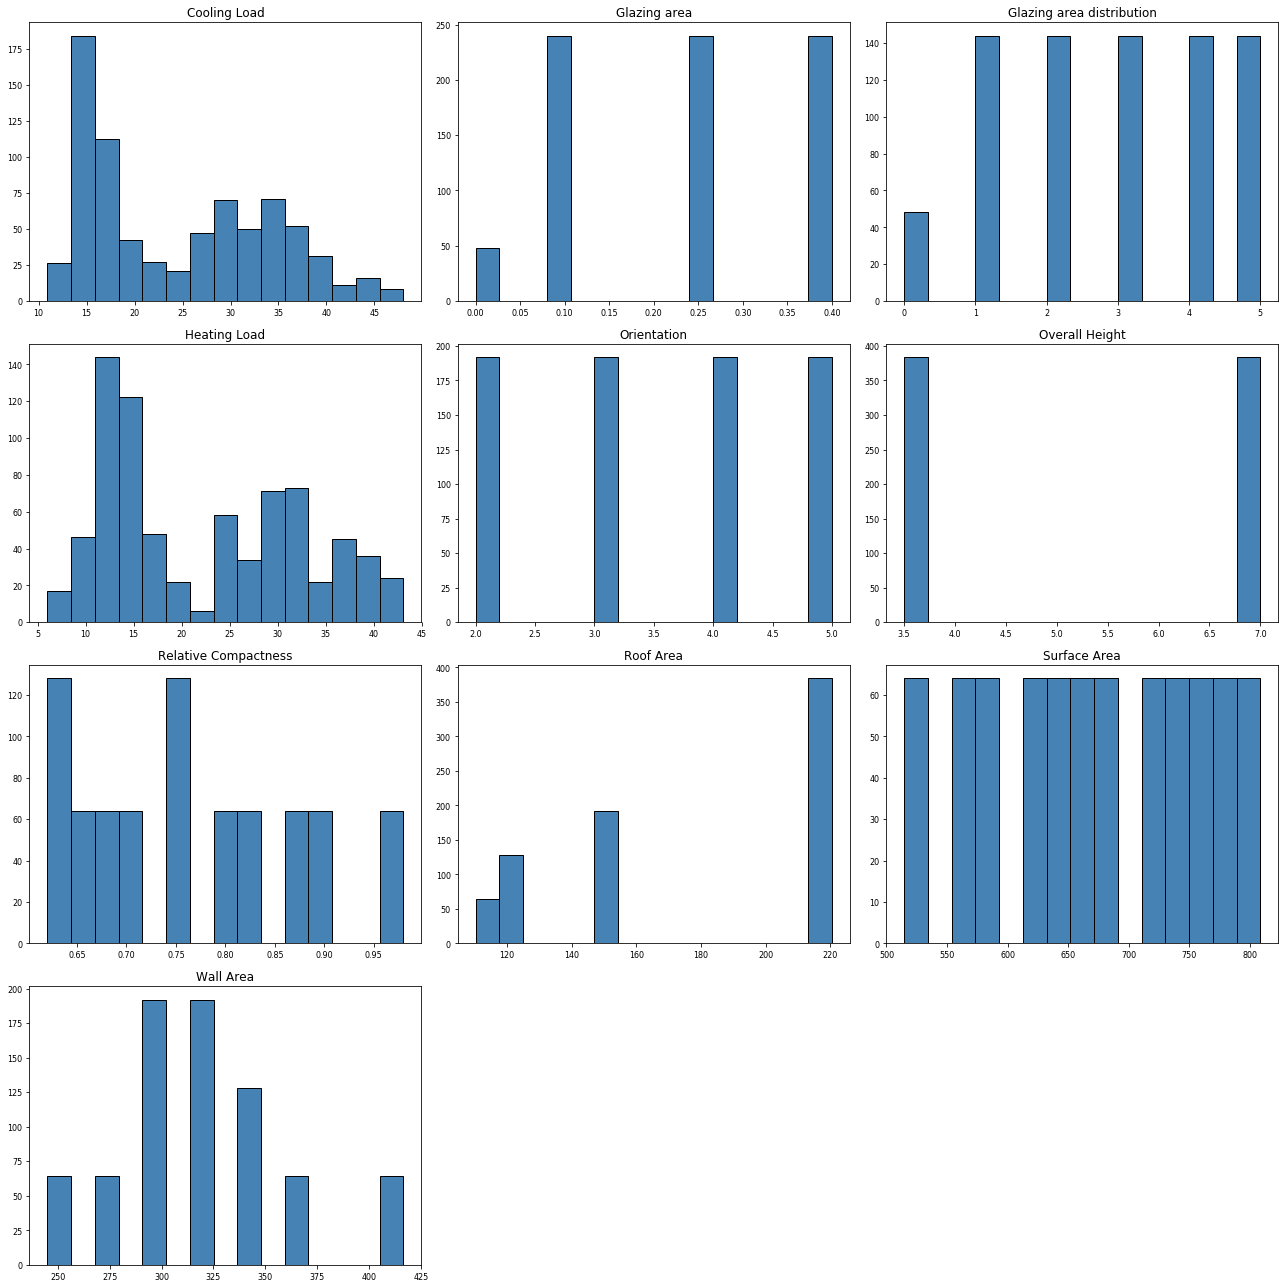

In [46]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
df.hist(ax = ax, bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
            xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.show()

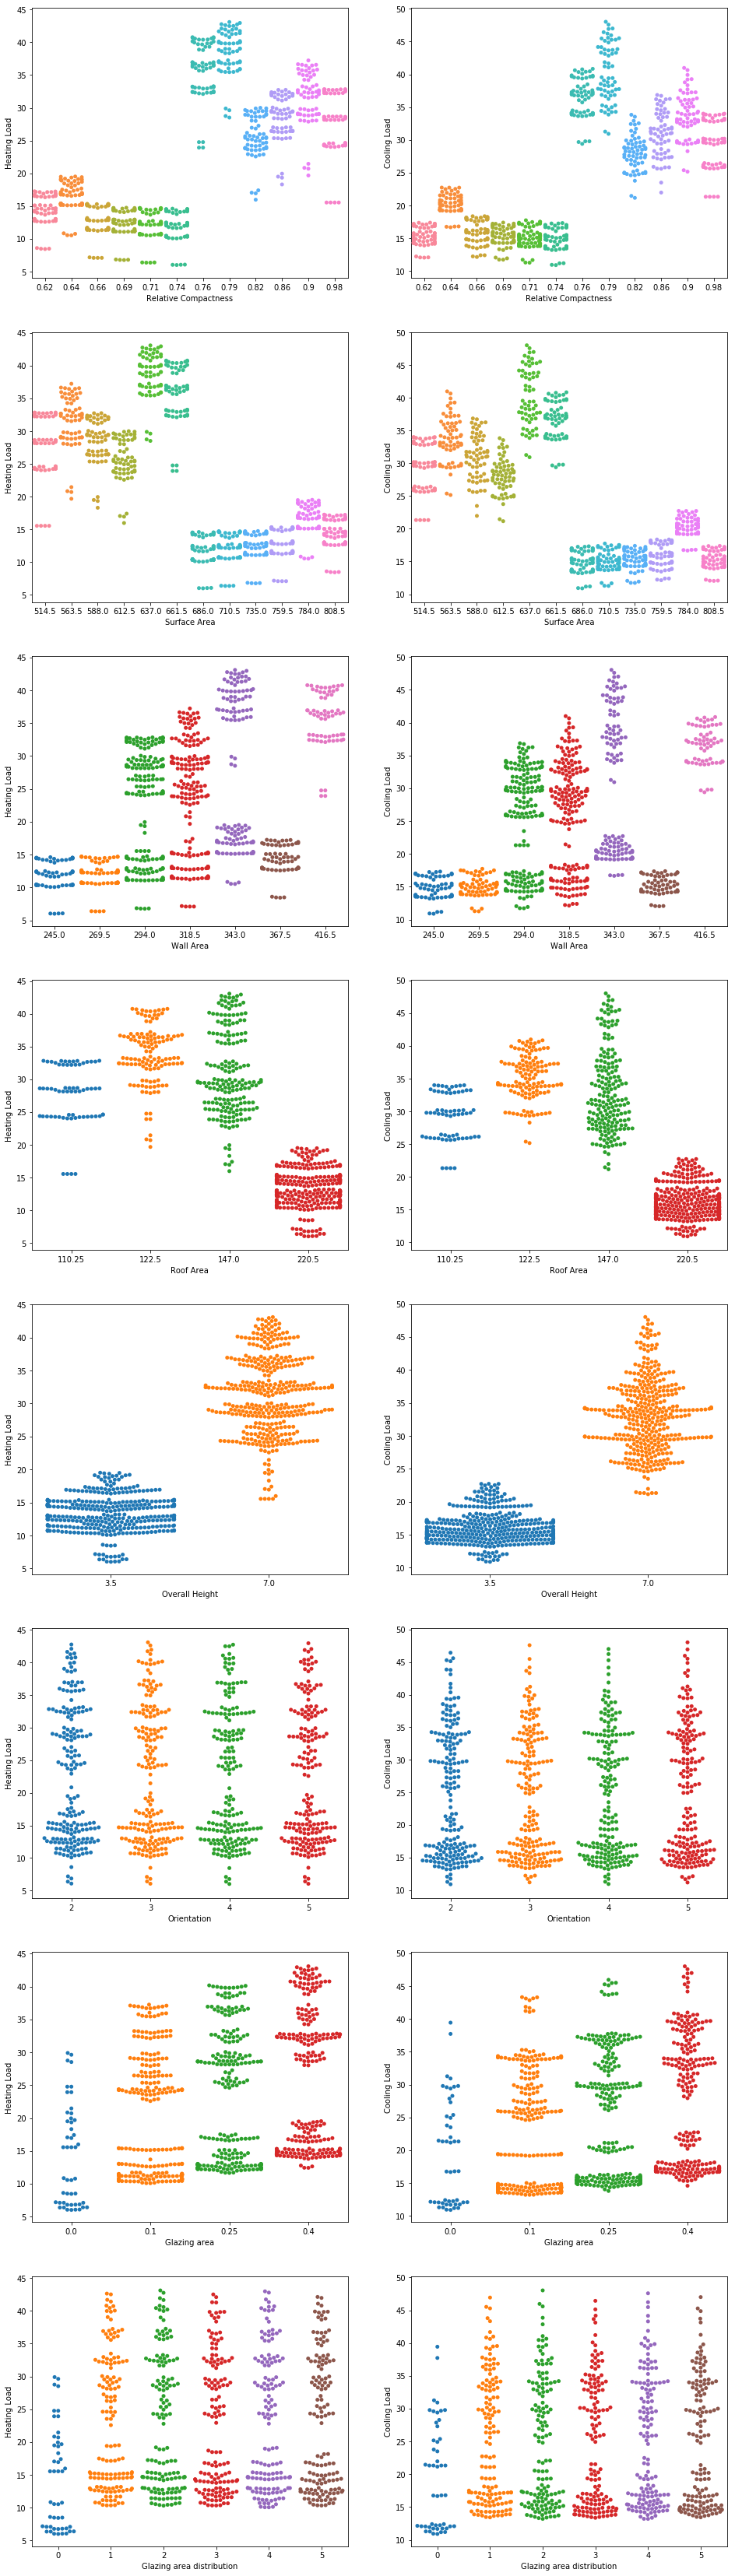

In [47]:
fig, ax = plt.subplots(nrows=len(feature_cols), ncols=2, figsize=(16, 60))
for i, col in enumerate(feature_cols):
    sns.catplot(x=col, y="Heating Load", kind="swarm", data=df, ax=ax[i][0])
    sns.catplot(x=col, y="Cooling Load", kind="swarm", data=df, ax=ax[i][1])
    plt.close(2)
    plt.close(3)

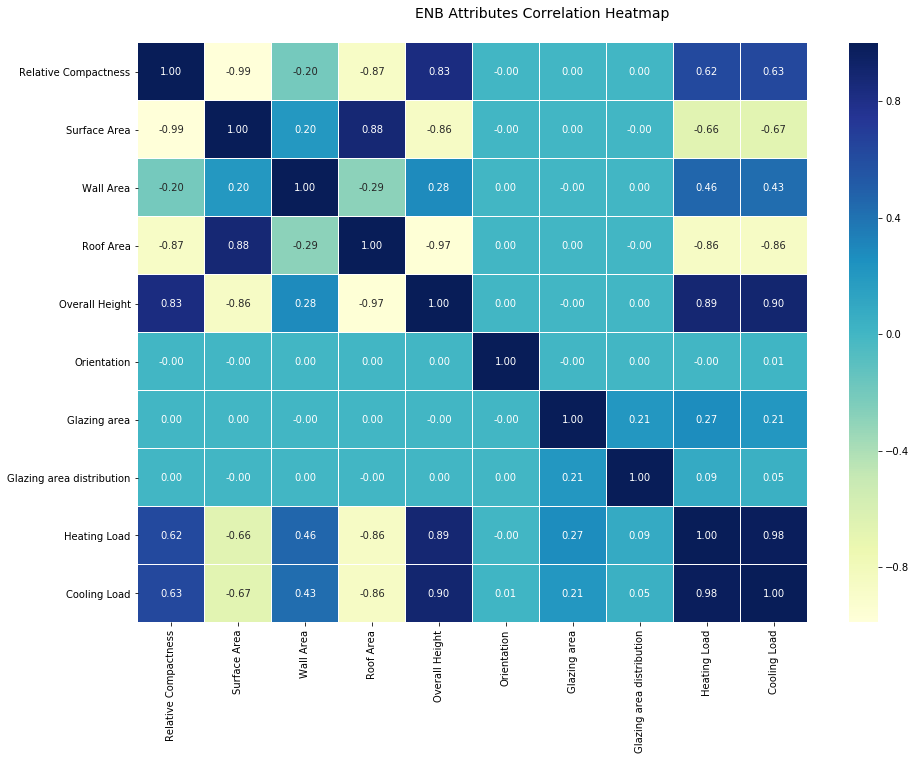

In [63]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax,fmt='.2f', cmap="YlGnBu", linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('ENB Attributes Correlation Heatmap', fontsize=14)

In [82]:
q1_heating, q3_heating = np.percentile(df['Heating Load'], [25, 75])
q1_cooling, q3_cooling = np.percentile(df['Cooling Load'], [25, 75])

df_copy = df.copy()
df_copy['Heating Load'] = df_copy['Heating Load'].apply(lambda value: 'low' if value <= q1_heating 
                                                                  else 'medium' if value <= q3_heating 
                                                                  else 'high') 
df_copy['Cooling Load'] = df_copy['Cooling Load'].apply(lambda value: 'low' if value <= q1_cooling 
                                                                  else 'medium' if value <= q3_cooling 
                                                                  else 'high')
df_copy.reset_index(inplace=True, drop=True)
subset_df = df_copy[feature_cols]
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=feature_cols)


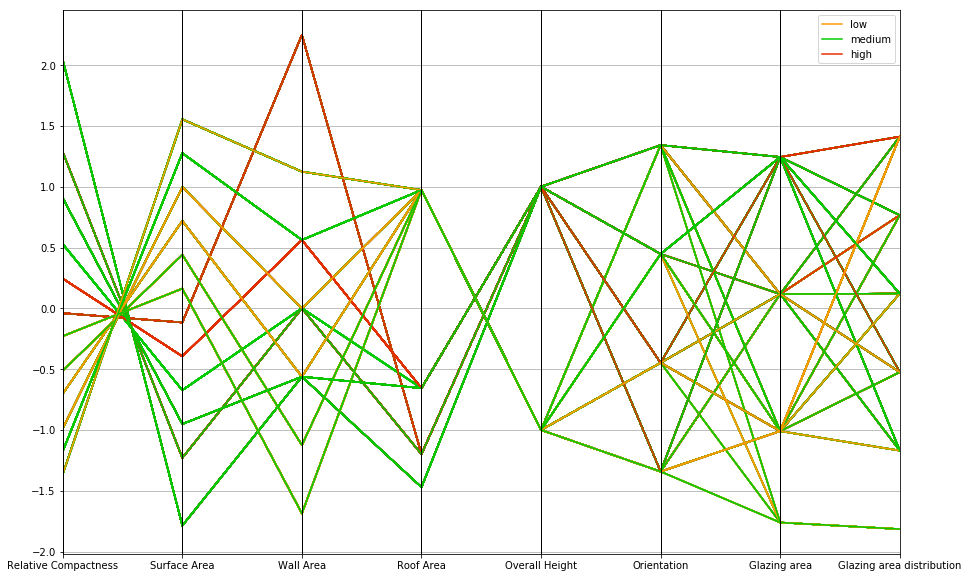

In [52]:
final_df = pd.concat([scaled_df, df_copy['Heating Load']], axis=1)
final_df.reset_index(inplace=True, drop=True)

f, ax = plt.subplots(figsize=(15, 10))
pc = parallel_coordinates(final_df, 'Heating Load', color=('#ff9900', '#00cc00', '#e62e00'), ax = ax)

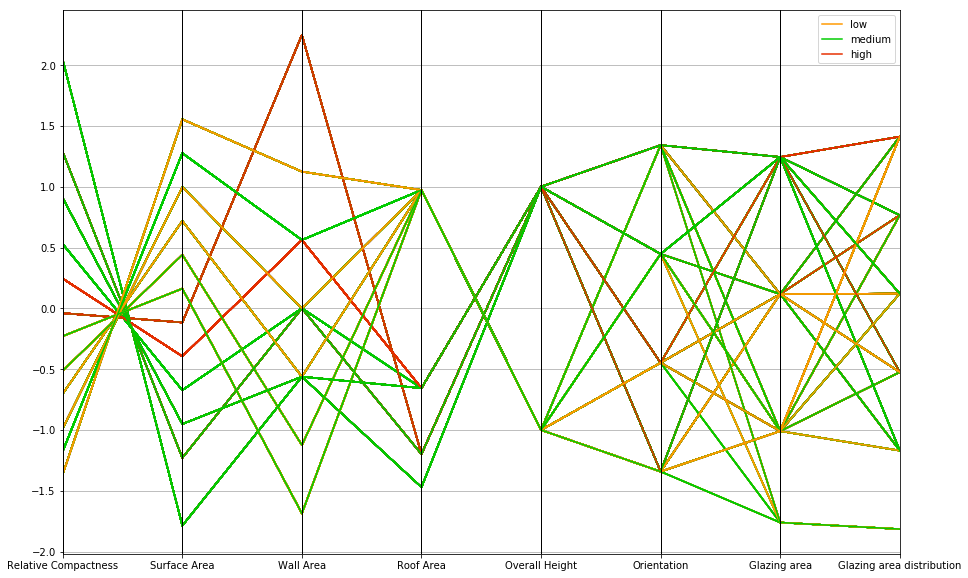

In [53]:
final_df = pd.concat([scaled_df, df_copy['Cooling Load']], axis=1)
final_df.reset_index(inplace=True, drop=True)

f, ax = plt.subplots(figsize=(15, 10))
pc = parallel_coordinates(final_df, 'Cooling Load', color=('#ff9900', '#00cc00', '#e62e00'), ax = ax)

Feature ranking:
1. feature Glazing area (0.355977)
2. feature Glazing area distribution (0.214727)
3. feature Orientation (0.148386)
4. feature Relative Compactness (0.073382)
5. feature Surface Area (0.073189)
6. feature Wall Area (0.066303)
7. feature Roof Area (0.040704)
8. feature Overall Height (0.027332)


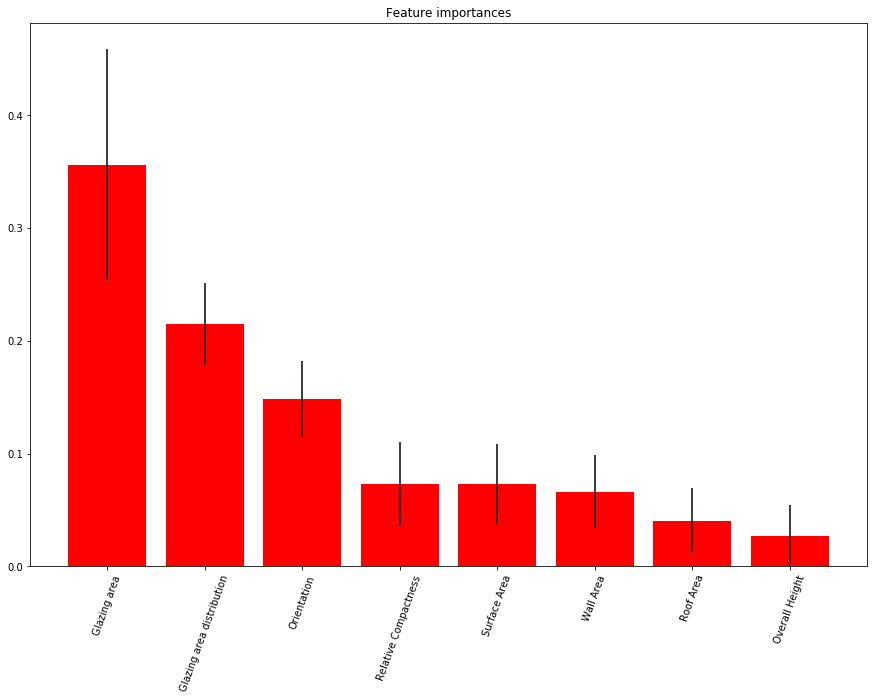

In [81]:
# Build a forest and compute the feature importances
 
X = df[feature_cols]
y = df[target_cols]

col_names = dict(zip([0, 1, 2, 3, 4, 5, 6, 7], columns.values()))

est = KBinsDiscretizer(n_bins=30, encode='ordinal', strategy='uniform')
y_binned = est.fit_transform(y.values)
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y_binned)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, col_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
f, ax = plt.subplots(figsize=(15, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [list(col_names.values())[i] for i in indices], rotation=70)
plt.show()